<a href="https://colab.research.google.com/github/aanasingla/aana-the-techie/blob/main/R_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import random
import string

def generate_random_string(length=10):
    characters = string.ascii_letters + string.digits  # A-Z, a-z, 0-9
    return ''.join(random.choices(characters, k=length))

random_strings = [generate_random_string() for _ in range(1000)]


df_random = pd.DataFrame(random_strings, columns=["Random_String"])
df_random.to_csv("random_strings_1000.csv", index=False)

df_random.head()


,Random_String
0,GdsVxAYK17
1,HtAQF68p8O
2,4XTWEF76wP
3,O4jTsGKmUh
4,FiXa8QYPxc


In [2]:
!pip install seaborn matplotlib pandas numpy


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------
# (A) Create a random dataset of 100 rows × 30 columns
# -----------------------------------------------------
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), columns=[f"V{i+1}" for i in range(30)])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,103,180,93,15,107,72,189,21,103,122,...,88,158,38,130,192,188,21,161,58,22
1,89,49,59,170,188,15,190,190,175,190,...,18,132,89,60,14,9,90,53,130,84
2,92,111,188,199,172,8,175,35,81,164,...,146,44,162,190,14,95,48,15,200,190
3,40,82,111,53,24,154,188,124,41,157,...,139,81,136,163,163,33,123,5,41,28
4,135,72,12,162,33,48,151,62,37,99,...,103,27,137,15,90,42,124,179,63,96


In [3]:
df_with_na = df.mask(df.applymap(lambda x: 10 <= x <= 60))
rows_with_na = df_with_na.isnull().any(axis=1).sum()

print(" Number of rows with missing values:", rows_with_na)
df_with_na.head()

 Number of rows with missing values: 100


/tmp/ipython-input-3-406418371.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_with_na = df.mask(df.applymap(lambda x: 10 <= x <= 60))


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,103.0,180.0,93.0,NaN,107.0,72.0,189.0,NaN,103.0,122.0,...,88.0,158.0,NaN,130.0,192.0,188.0,NaN,161.0,NaN,NaN
1,89.0,NaN,NaN,170.0,188.0,NaN,190.0,190.0,175.0,190.0,...,NaN,132.0,89.0,NaN,NaN,9.0,90.0,NaN,130.0,84.0
2,92.0,111.0,188.0,199.0,172.0,8.0,175.0,NaN,81.0,164.0,...,146.0,NaN,162.0,190.0,NaN,95.0,NaN,NaN,200.0,190.0
3,NaN,82.0,111.0,NaN,NaN,154.0,188.0,124.0,NaN,157.0,...,139.0,81.0,136.0,163.0,163.0,NaN,123.0,5.0,NaN,NaN
4,135.0,72.0,NaN,162.0,NaN,NaN,151.0,62.0,NaN,99.0,...,103.0,NaN,137.0,NaN,90.0,NaN,124.0,179.0,63.0,96.0


In [4]:
df_filled = df_with_na.apply(lambda col: col.fillna(col.mean()), axis=0)
df_filled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,103.000000,180.000000,93.000000,127.792683,107.000000,72.000000,189.0,110.739726,103.000000,122.0,...,88.000000,158.000000,124.766234,130.000000,192.000000,188.000000,121.869565,161.000000,118.652174,127.724638
1,89.000000,124.448718,110.063291,170.000000,188.000000,121.069444,190.0,190.000000,175.000000,190.0,...,125.447368,132.000000,89.000000,123.797101,124.479452,9.000000,90.000000,121.863014,130.000000,84.000000
2,92.000000,111.000000,188.000000,199.000000,172.000000,8.000000,175.0,110.739726,81.000000,164.0,...,146.000000,123.094595,162.000000,190.000000,124.479452,95.000000,121.869565,121.863014,200.000000,190.000000
3,130.116883,82.000000,111.000000,127.792683,120.810811,154.000000,188.0,124.000000,123.556962,157.0,...,139.000000,81.000000,136.000000,163.000000,163.000000,125.405405,123.000000,5.000000,118.652174,127.724638
4,135.000000,72.000000,110.063291,162.000000,120.810811,121.069444,151.0,62.000000,123.556962,99.0,...,103.000000,123.094595,137.000000,123.797101,90.000000,125.405405,124.000000,179.000000,63.000000,96.000000


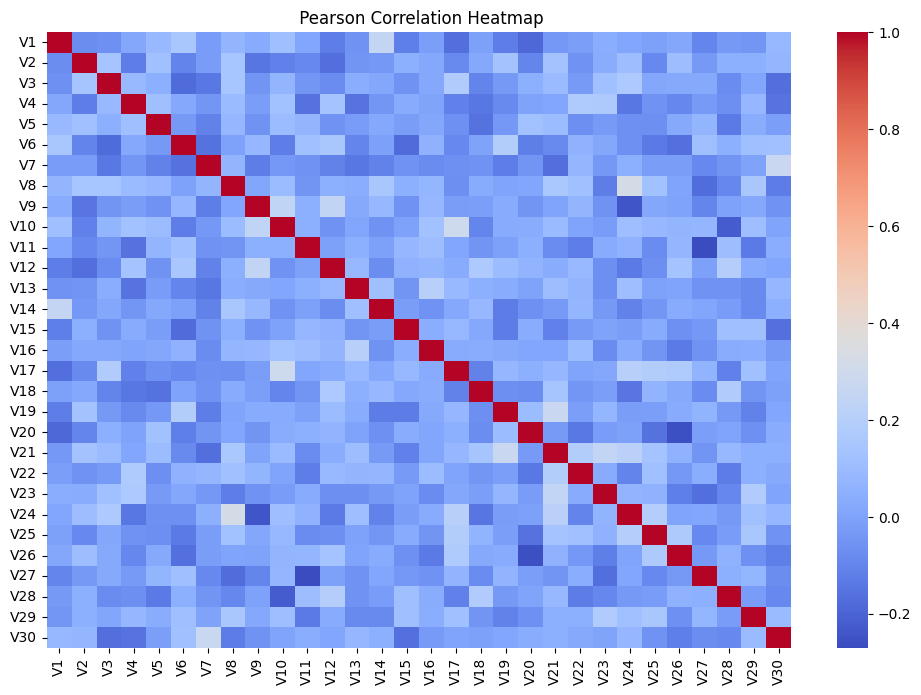

 Correlation ≤ 0.7:
 V1  V2   -0.077302
    V3   -0.062974
    V4    0.012300
    V5    0.090384
    V6    0.148143
dtype: float64


In [5]:
# Calculate correlation matrix
correlation_matrix = df_filled.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title(" Pearson Correlation Heatmap")
plt.show()

# Show correlated column pairs with correlation ≤ 0.7
low_corr = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1) == 1)
low_corr_pairs = low_corr.stack()
filtered_pairs = low_corr_pairs[abs(low_corr_pairs) <= 0.7]
print(" Correlation ≤ 0.7:\n", filtered_pairs.head())

In [6]:
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10
df_normalized.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,5.102041,8.963731,4.595960,6.385415,5.329949,3.585859,9.641026,5.514559,5.179487,6.102564,...,4.416244,7.889447,6.161543,6.548223,9.639175,9.390863,6.073847,8.080808,5.849601,6.562815
1,4.387755,6.085426,5.457742,8.527919,9.441624,6.064113,9.692308,9.497487,8.871795,9.589744,...,6.317125,6.582915,4.336735,6.233355,6.158735,0.304569,4.472362,6.104193,6.428571,4.224599
2,4.540816,5.388601,9.393939,10.000000,8.629442,0.353535,8.923077,5.514559,4.051282,8.256410,...,7.360406,6.135407,8.061224,9.593909,6.158735,4.670051,6.073847,6.104193,10.000000,9.893048
3,6.485555,3.886010,5.505051,6.385415,6.031006,7.727273,9.589744,6.180905,6.233690,7.897436,...,7.005076,4.020101,6.734694,8.223350,8.144330,6.213472,6.130653,0.202020,5.849601,6.562815
4,6.734694,3.367876,5.457742,8.121827,6.031006,6.064113,7.692308,3.065327,6.233690,4.923077,...,5.177665,6.135407,6.785714,6.233355,4.381443,6.213472,6.180905,8.989899,3.010204,4.866310


In [7]:
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)
df_binary.head()

/tmp/ipython-input-7-3539049416.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


np.random.seed(42)

# -----------------------------------------------------
# (A) Generate dataset of 500 rows × 10 columns
# -----------------------------------------------------
data = pd.DataFrame({
    f'V{i+1}': (
        np.random.randint(-10, 11, 500) if i < 4 else
        np.random.randint(10, 21, 500) if i < 8 else
        np.random.randint(-100, 101, 500)
    )
    for i in range(10)
})

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-4,-4,3,5,19,17,12,20,92,-35
1,9,3,0,-5,20,12,15,14,96,-24
2,4,9,1,8,16,14,11,10,-74,-56
3,0,8,2,-4,15,19,17,17,-21,-22
4,-3,4,-3,-1,15,13,11,20,33,-81


In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

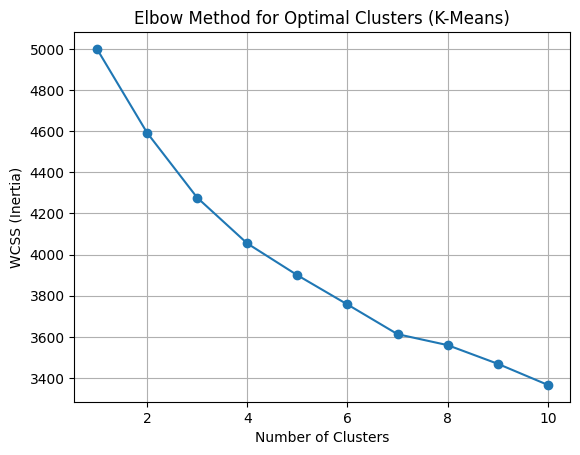

In [10]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters (K-Means)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

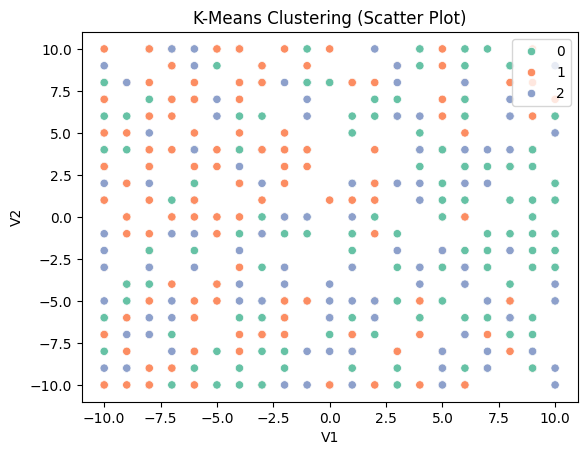

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)

data["KMeans_Cluster"] = clusters_kmeans

sns.scatterplot(x=data["V1"], y=data["V2"], hue=clusters_kmeans, palette="Set2")
plt.title("K-Means Clustering (Scatter Plot)")
plt.show()

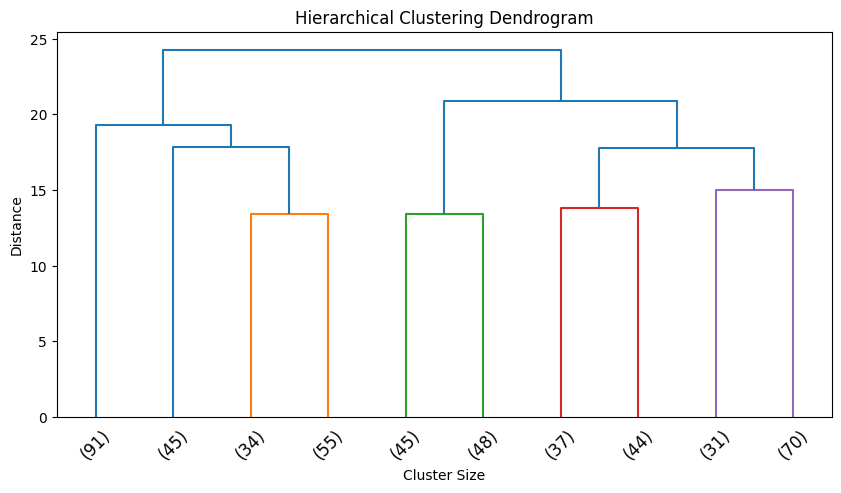

In [12]:
linked = linkage(data_scaled, method='ward')


plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

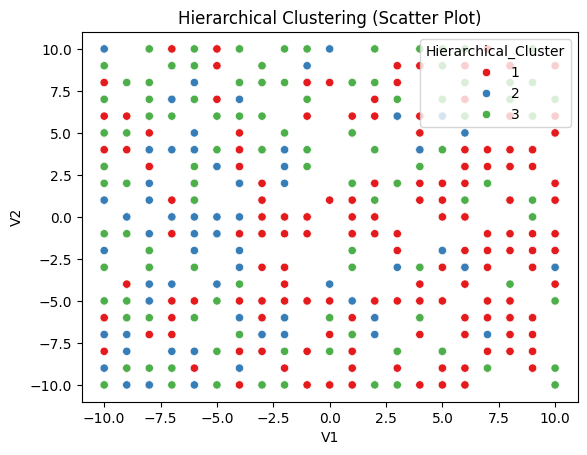

In [13]:
data["Hierarchical_Cluster"] = fcluster(linked, 3, criterion='maxclust')

sns.scatterplot(x=data["V1"], y=data["V2"], hue=data["Hierarchical_Cluster"], palette="Set1")
plt.title("Hierarchical Clustering (Scatter Plot)")
plt.show()

In [14]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# ----------------------------
# (A) Generate dataset
# ----------------------------
data_q4 = pd.DataFrame(np.random.randint(-100, 101, size=(600, 15)), columns=[f'V{i+1}' for i in range(15)])

# View top rows
data_q4.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,2,79,-8,-86,6,-29,88,-80,2,21,-26,-13,16,-1,3
1,51,30,49,-48,-99,-13,57,-63,29,91,87,-80,60,-43,-79
2,-12,-52,-42,69,87,-86,89,89,74,89,-50,7,-46,-37,30
3,-50,34,-80,-28,66,-83,31,-12,-41,-87,-92,-11,-48,29,-17
4,-9,10,87,98,71,-93,74,-66,-20,63,-51,3,31,-99,33


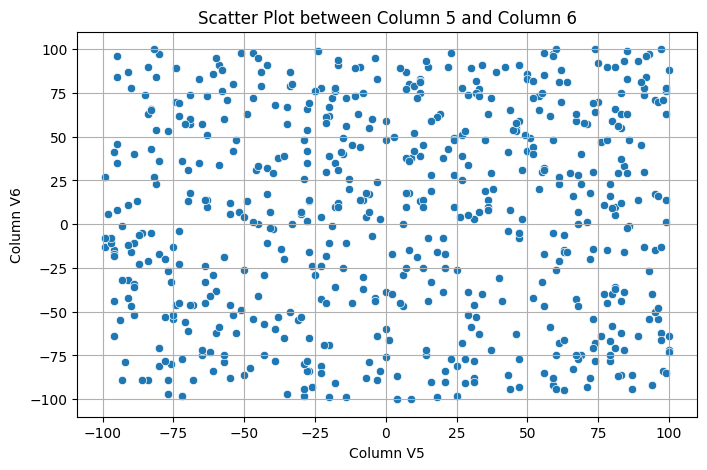

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_q4['V5'], y=data_q4['V6'])
plt.title('Scatter Plot between Column 5 and Column 6')
plt.xlabel('Column V5')
plt.ylabel('Column V6')
plt.grid(True)
plt.show()

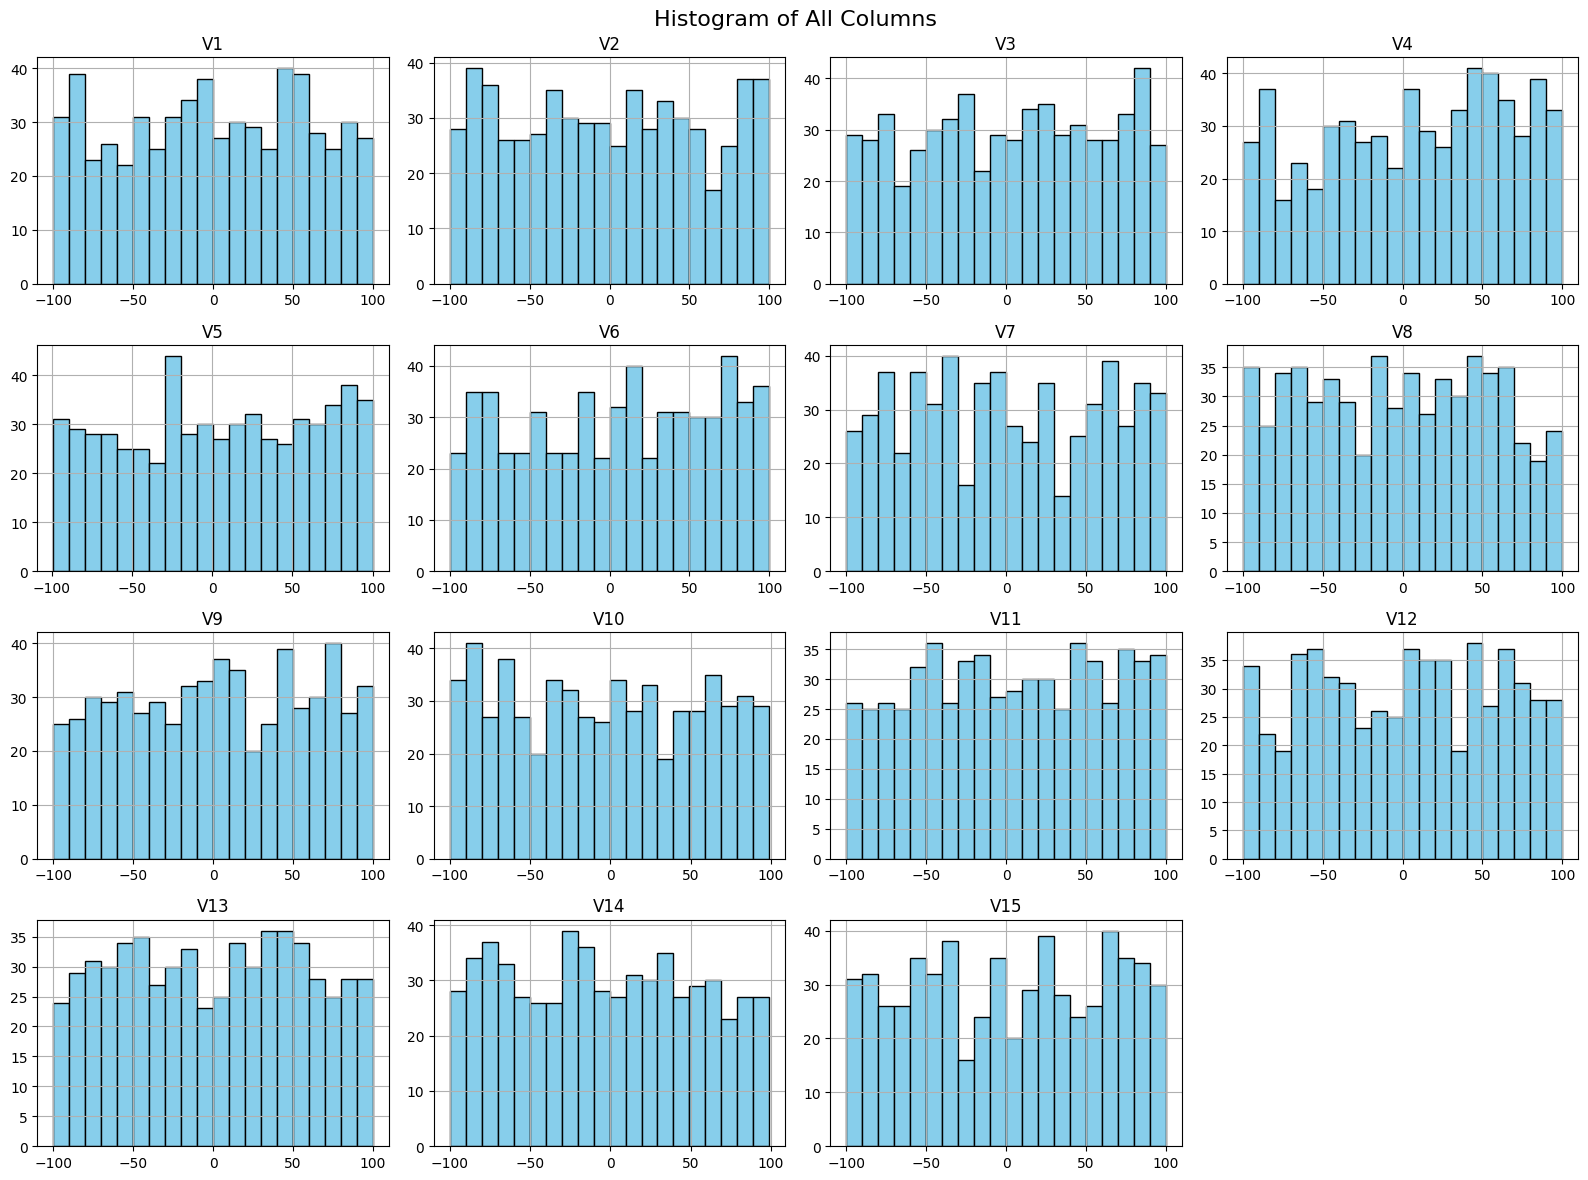

In [16]:
data_q4.hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of All Columns", fontsize=16)
plt.tight_layout()
plt.show()

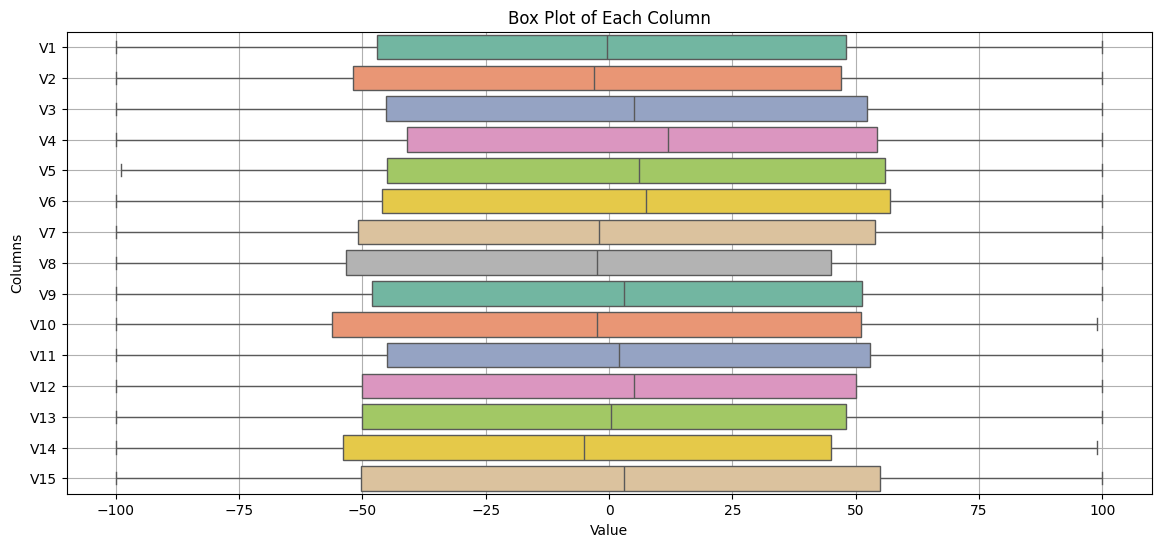

In [17]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_q4, orient='h', palette='Set2')
plt.title('Box Plot of Each Column')
plt.xlabel("Value")
plt.ylabel("Columns")
plt.grid(True)
plt.show()

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

np.random.seed(42)
data_q5 = np.random.uniform(5, 10, size=(500, 5))
df_q5 = pd.DataFrame(data_q5, columns=[f'Col{i+1}' for i in range(5)])


df_q5.head()

,Col1,Col2,Col3,Col4,Col5
0,6.872701,9.753572,8.659970,7.993292,5.780093
1,5.779973,5.290418,9.330881,8.005575,8.540363
2,5.102922,9.849549,9.162213,6.061696,5.909125
3,5.917023,6.521211,7.623782,7.159725,6.456146
4,8.059264,5.697469,6.460723,6.831809,7.280350


In [19]:
print("T-Test Results (H0: mean = 7.5):\n")
for col in df_q5.columns:
    t_stat, p_val = ttest_1samp(df_q5[col], popmean=7.5)
    print(f"{col}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

T-Test Results (H0: mean = 7.5):

Col1: t-statistic = 0.5041, p-value = 0.6144
Col2: t-statistic = -0.7206, p-value = 0.4715
Col3: t-statistic = 0.0366, p-value = 0.9708
Col4: t-statistic = -0.1038, p-value = 0.9173
Col5: t-statistic = -0.1490, p-value = 0.8816


In [20]:
print("\nWilcoxon Signed Rank Test Results (vs. median 7.5):\n")
for col in df_q5.columns:
    try:
        stat, p = wilcoxon(df_q5[col] - 7.5)
        print(f"{col}: stat = {stat:.4f}, p-value = {p:.4f}")
    except Exception as e:
        print(f"{col}: Error - {e}")


Wilcoxon Signed Rank Test Results (vs. median 7.5):

Col1: stat = 60997.0000, p-value = 0.6145
Col2: stat = 60213.0000, p-value = 0.4555
Col3: stat = 62434.0000, p-value = 0.9529
Col4: stat = 62199.0000, p-value = 0.8951
Col5: stat = 62175.0000, p-value = 0.8893


In [21]:
col3 = df_q5['Col3']
col4 = df_q5['Col4']


t_stat, p_val = ttest_ind(col3, col4)
print(f"\nTwo Sample t-Test between Col3 & Col4: t-stat = {t_stat:.4f},p = {p_val:.4f}")

rank_stat, rank_p = ranksums(col3, col4)
print(f"Wilcoxon Rank Sum Test: stat = {rank_stat:.4f}, p = {rank_p:.4f}")


Two Sample t-Test between Col3 & Col4: t-stat = 0.0999,p = 0.9205
Wilcoxon Rank Sum Test: stat = 0.1191, p = 0.9052
